In [2]:
import torch
import numpy as np
from torchinfo import summary

In [9]:
## neural network
## data = (x,y) 1000 samples

X = torch.rand(1000,10,dtype=torch.float32)
labels = [0.0,1.0]
y = []
for i in range(1000):
  y.append(np.random.choice(labels,size=1)[0])
y = torch.tensor(y,dtype=torch.float32)

In [26]:
X[0].shape

torch.Size([10])

In [12]:
y

tensor([1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
        1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
        1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
        0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
        1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
        0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
        1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
        0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
        0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
        1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
        0., 0., 0., 0., 1., 1., 0., 0., 

In [30]:
## creating neural network
import torch.nn as nn
class my_model(nn.Module):
  def __init__(self,num_feature):
    super().__init__()
    self.network = nn.Sequential(
        nn.Linear(num_feature,3), # input_feature = num_feature , out_feature = 3 i.e three values goies out , num_feature = number of columns per row
        nn.ReLU(),
        nn.Linear(3,2),
        nn.ReLU(),
        nn.Linear(2,1),
        nn.Sigmoid()
    )
  def forward(self,X):
    return self.network(X)

## pictorial representation
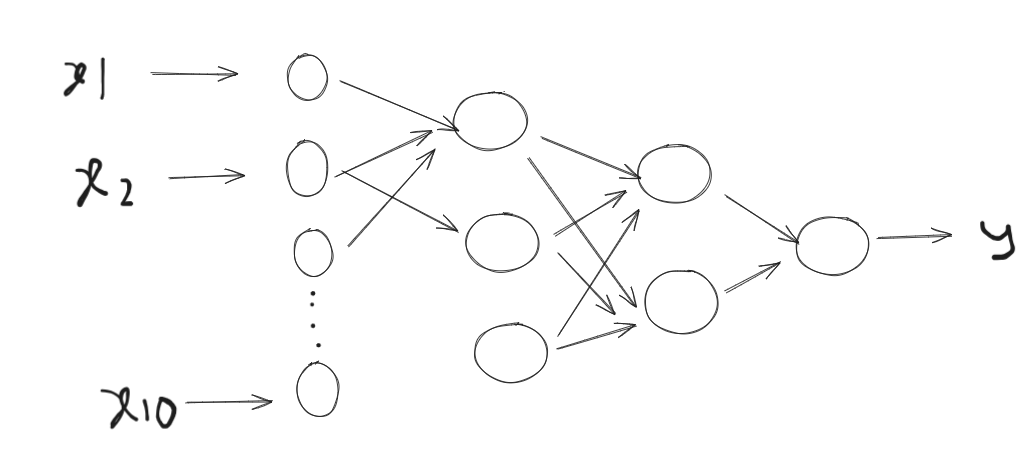

In [21]:
epochs = 50
learning_rate = 0.01

In [14]:
## loss
loss_function = nn.BCELoss()

In [35]:
## model
model = my_model(X.shape[1]) # declare the model
model(X) # pass the current X such that model parameters (weights,bias) will assign
## optimizer
optimizer = torch.optim.SGD(
    model.parameters(),
    lr = learning_rate
)

In [38]:
# batch gradient descent
for epoch in range(epochs):
  optimizer.zero_grad()
  y_pred = model(X)
  loss = loss_function(y_pred,y.view(-1,1))
  loss.backward()
  optimizer.step()
  print(f"epoch:{epoch+1} Loss:{loss}")


epoch:1 Loss:0.7204831838607788
epoch:2 Loss:0.7203501462936401
epoch:3 Loss:0.7202180027961731
epoch:4 Loss:0.7200862765312195
epoch:5 Loss:0.7199555039405823
epoch:6 Loss:0.7198251485824585
epoch:7 Loss:0.7196952700614929
epoch:8 Loss:0.7195661664009094
epoch:9 Loss:0.7194376587867737
epoch:10 Loss:0.7193096876144409
epoch:11 Loss:0.7191824913024902
epoch:12 Loss:0.719055712223053
epoch:13 Loss:0.7189297080039978
epoch:14 Loss:0.7188040614128113
epoch:15 Loss:0.7186792492866516
epoch:16 Loss:0.7185549139976501
epoch:17 Loss:0.718431293964386
epoch:18 Loss:0.7183082103729248
epoch:19 Loss:0.7181854844093323
epoch:20 Loss:0.7180635333061218
epoch:21 Loss:0.7179421782493591
epoch:22 Loss:0.7178213000297546
epoch:23 Loss:0.7177010774612427
epoch:24 Loss:0.7175816297531128
epoch:25 Loss:0.7174624800682068
epoch:26 Loss:0.7173438668251038
epoch:27 Loss:0.7172259092330933
epoch:28 Loss:0.7171084880828857
epoch:29 Loss:0.7169917225837708
epoch:30 Loss:0.7168753743171692
epoch:31 Loss:0.71675

### This loss is worng because the data is generated